In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import cv2 
import random 
import os  


from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.layers import Dense , Input ,Flatten , Conv2D , Dropout
from tensorflow.keras.layers import BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model , Sequential 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau 
from tensorflow.keras.utils import plot_model  
    
from IPython.display import SVG, Image 
    
import tensorflow as tf  

In [2]:
tf.__version__

'2.13.0'

Import Dataset

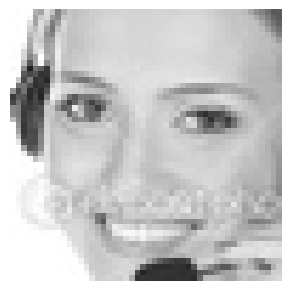

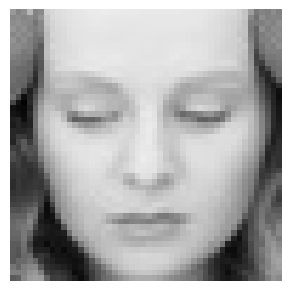

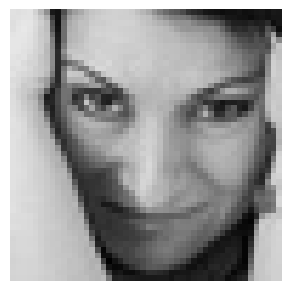

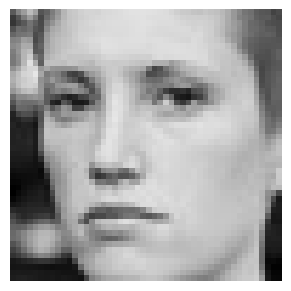

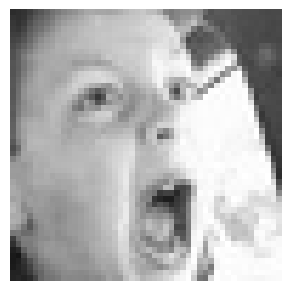

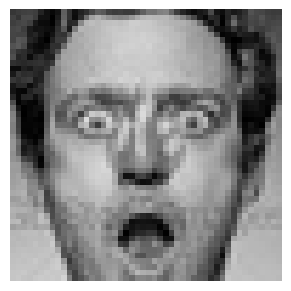

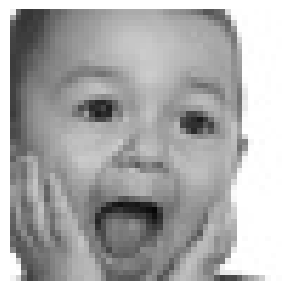

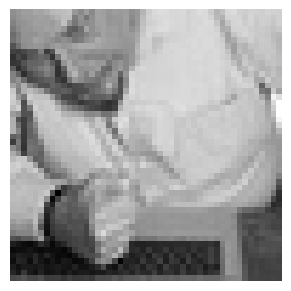

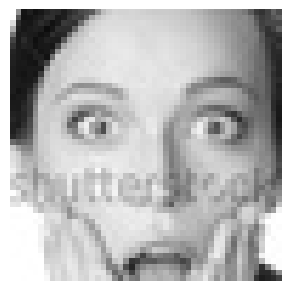

In [9]:
images = glob("train/**/**")
for i in range(9):
    image=random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')               

Training Dataset

In [11]:
img_size=48
batch_size=64
datagen_train= ImageDataGenerator()
train_generator=datagen_train.flow_from_directory("train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode="categorical",
                                                    shuffle=True)
datagen_validation=ImageDataGenerator() 
train_validation=datagen_train.flow_from_directory("test/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode="categorical",
                                                    shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


Model

In [14]:
def Convolution(input_tensor,filters,kernel_size):
        
        x = Conv2D(filters=filters,kernel_size=kernel_size,padding="same")(input_tensor)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = MaxPooling2D(pool_size=(2,2))(x)
        x = Dropout(0.25)(x) 
         
        return x 



def Dense_f(input_tensor,nodes):
        
        x = Dense(nodes)(input_tensor)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Dropout(0.25)(x) 
    
        return x 


def model_fer(input_shape):
        inputs = Input(input_shape)
        conv_1 = Convolution(inputs,32,(3,3)) 
        conv_2 = Convolution(inputs,64,(5,5))
        conv_3 = Convolution(inputs,128,(3,3)) 
    
        flatten = Flatten()(conv_3)
        dense_1 = Dense_f(flatten,256)
    
        output = Dense(7,activation="softmax")(dense_1)
    
        model=Model(inputs=[inputs],outputs=[output])
        model.compile(loss=['categorical_crossentropy'], optimizer='adam', metrics=['accuracy'])
    
        return model 

In [17]:
model = model_fer((48,48,1))

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_2 (Bat  (None, 48, 48, 128)       512       
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 128)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 24, 128)       0     

Intialize Model

In [19]:
epochs = 15
steps_per_epoch= train_generator.n//train_generator.batch_size
validation_steps= train_validation.n//train_generator.batch_size

checkpoint=ModelCheckpoint("model_weights.h5",monitor='val_accuracy',save_weights_only=True,mode="max", verbose=1)
callbacks=[checkpoint]

Train Model

In [20]:
history=model.fit(
    x = train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=train_validation,
    validation_steps=validation_steps,
    callbacks=callbacks)

Epoch 1/15
448/448 [==============================] - ETA: 0s - loss: 1.6445 - accuracy: 0.3784
Epoch 1: saving model to model_weights.h5
448/448 [==============================] - 751s 2s/step - loss: 1.6445 - accuracy: 0.3784 - val_loss: 1.8428 - val_accuracy: 0.2628
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.3519 - accuracy: 0.4883
Epoch 2: saving model to model_weights.h5
448/448 [==============================] - 244s 545ms/step - loss: 1.3519 - accuracy: 0.4883 - val_loss: 1.6291 - val_accuracy: 0.3617
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.1964 - accuracy: 0.5548
Epoch 3: saving model to model_weights.h5
448/448 [==============================] - 245s 548ms/step - loss: 1.1964 - accuracy: 0.5548 - val_loss: 1.5193 - val_accuracy: 0.4056
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 1.0637 - accuracy: 0.6075
Epoch 4: saving model to model_weights.h5
448/448 [==============================] - 242

Model Evaluation

In [21]:
model.evaluate(train_validation)

113/113 [==============================] - 11s 92ms/step - loss: 1.9232 - accuracy: 0.5011


[1.9232350587844849, 0.5011144876480103]

Model Loss

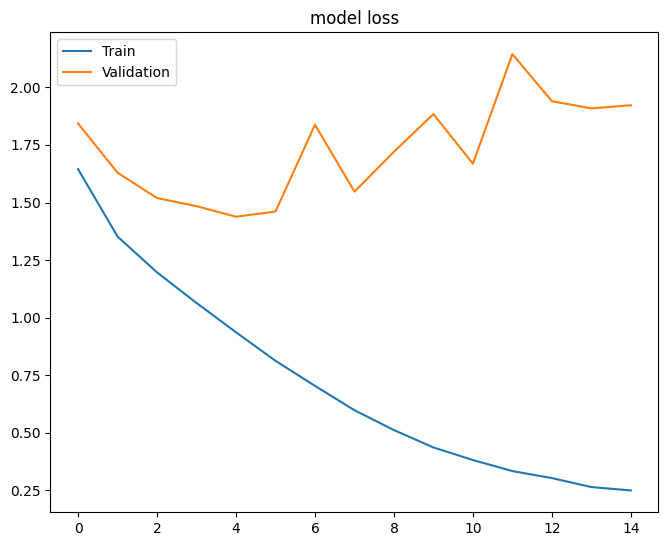

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('model loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

Model Accuracy

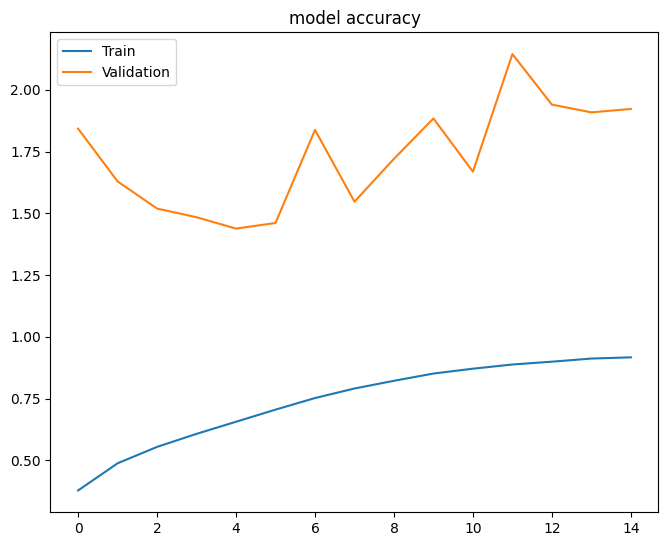

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss']) 
plt.title('model accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

Save Model

In [24]:
model_json=model.to_json()
with open("model_a.json","w") as json_file:
        json_file.write(model_json)